# Filters

Filter dalam konteks pengolahan sinyal digital adalah suatu algoritma atau proses matematika yang digunakan untuk mengubah karakteristik suatu sinyal digital. Tujuan dari filter ini bisa bermacam-macam, seperti:

- Pengurangan Kebisingan: Filter digunakan untuk mengurangi kebisingan yang ada dalam sinyal, sehingga sinyal yang dihasilkan menjadi lebih bersih dan jelas.
- Pemisahan Sinyal: Filter dapat memisahkan berbagai komponen dalam suatu sinyal, misalnya memisahkan suara dan musik dari rekaman audio, atau memisahkan sinyal pembawa dan informasi dalam sistem komunikasi.
- Penyaringan: Filter dapat digunakan untuk menyaring komponen frekuensi tertentu dari suatu sinyal, seperti membuang frekuensi tinggi yang tidak diinginkan atau menguatkan frekuensi tertentu.
- Penghilangan Gangguan: Filter dapat digunakan untuk menghilangkan gangguan atau interferensi dari sinyal, sehingga sinyal yang dihasilkan lebih akurat dan bermanfaat.
Beberapa jenis filter yang umum digunakan dalam pengolahan sinyal digital:

1. Filter FIR (Finite Impulse Response):
  - Filter FIR memiliki respons impuls yang berakhir dalam jumlah sampel tertentu.
  - Respon frekuensi filter FIR dapat dirancang dengan presisi karena karakteristiknya yang stabil.
  - Desain filter FIR sering kali dilakukan menggunakan teknik seperti metode windowing (seperti Blackman, Hamming, atau Kaiser) atau algoritma desain filter FIR langsung (seperti metode Parks-McClellan atau Remez).
  - Filter FIR sering digunakan untuk aplikasi di mana diperlukan respons frekuensi linier atau di mana kestabilan sistem sangat penting.
2. Filter IIR (Infinite Impulse Response):
  - Filter IIR memiliki respons impuls yang tak terbatas, yang memungkinkan pengaruh dari input masa lalu terhadap output filter.
  - Filter IIR lebih efisien dalam hal komputasi karena biasanya memerlukan jumlah parameter yang lebih sedikit dibandingkan dengan filter FIR untuk mencapai respon yang serupa.
  - Desain filter IIR sering kali dilakukan menggunakan teknik seperti desain Butterworth, Chebyshev, atau Elliptic.
  - Filter IIR digunakan dalam berbagai aplikasi, termasuk audio, komunikasi, dan pemrosesan sinyal biomedis.
3. Filter Butterworth:
  - Filter Butterworth adalah salah satu jenis filter IIR yang memiliki respons frekuensi rata-rata maksimum.
  - Filter Butterworth dirancang untuk memberikan respons frekuensi yang sehalus mungkin di wilayah passband.
  - Keunggulan utama dari filter Butterworth adalah kestabilan dan linearitasnya yang tinggi.
4. Filter Chebyshev:
  - Filter Chebyshev memperbolehkan adanya deviasi dari respon frekuensi yang diinginkan untuk mendapatkan ripple yang lebih kecil di wilayah passband atau stopband.
  - Filter Chebyshev sering digunakan ketika diperlukan ketajaman tepi yang tinggi di dalam respon frekuensi.
  - Terdapat dua jenis filter Chebyshev: Tipe I (ripple hanya terjadi di dalam passband) dan Tipe II (ripple hanya terjadi di dalam stopband).
5. Filter Elliptic (Cauer):
  - Filter Elliptic memperbolehkan deviasi frekuensi maksimum baik di wilayah passband maupun stopband.
  - Filter Elliptic sering digunakan dalam aplikasi di mana diperlukan penolakan frekuensi yang sangat tajam dan terdapat batasan ketat terhadap jumlah komponen frekuensi yang tidak diinginkan.
  - Keunggulan filter Elliptic adalah kemampuannya untuk mencapai penolakan frekuensi yang tinggi dengan jumlah koefisien yang relatif rendah.
6. Filter Savitzky-Golay:
  - Filter Savitzky-Golay umumnya digunakan untuk smoothing atau penghalusan data time-series dengan mempertahankan struktur sinyal asli.
  - Filter ini bekerja dengan menggunakan polinomial lokal untuk memperkirakan nilai rata-rata dalam jendela data tertentu.
  - Keunggulan dari filter ini adalah kemampuannya untuk menghilangkan noise tanpa mengurangi resolusi sinyal yang signifikan.
7. Filter Median:
  - Filter Median mengambil nilai median dari jendela tertentu dalam sinyal.
  - Filter ini efektif dalam mengurangi noise yang disebabkan oleh pencilan atau spike dalam data.
  - Keuntungan utama dari filter median adalah kemampuannya untuk mempertahankan tepi sinyal yang tajam sambil mengurangi noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter, filtfilt, medfilt

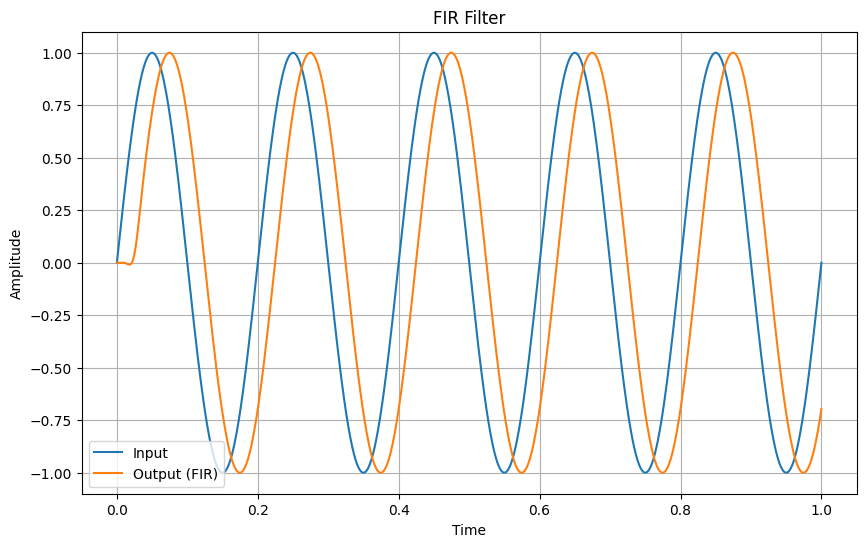

In [3]:
# Desain filter FIR
num_taps = 50
cutoff_freq = 0.1
b = firwin(num_taps, cutoff_freq)

# Generate sinyal input (misalnya, sinusoid)
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t)

# Terapkan filter FIR
y_fir = lfilter(b, 1, x)

# Plot sinyal input dan output FIR
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Input')
plt.plot(t, y_fir, label='Output (FIR)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('FIR Filter')
plt.grid(True)
plt.show()

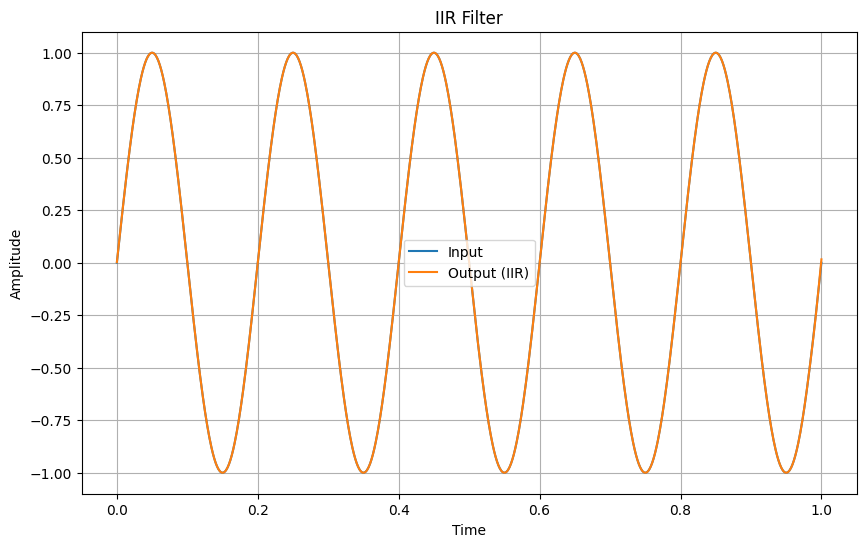

In [4]:
# Desain filter IIR
order = 4
b_iir, a_iir = iirfilter(order, cutoff_freq, btype='lowpass', analog=False, ftype='butter')

# Terapkan filter IIR
y_iir = filtfilt(b_iir, a_iir, x)

# Plot sinyal input dan output IIR
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Input')
plt.plot(t, y_iir, label='Output (IIR)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IIR Filter')
plt.grid(True)
plt.show()

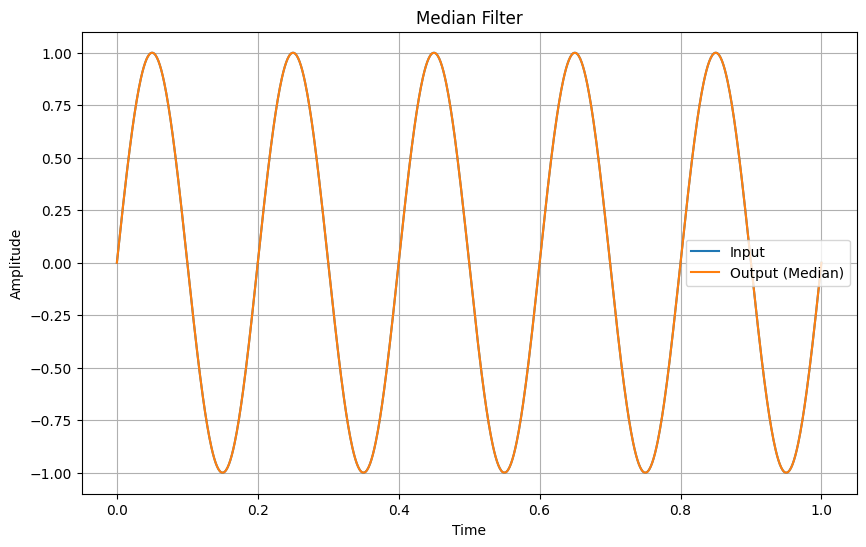

In [5]:
# Terapkan filter median
window_size = 5
y_median = medfilt(x, kernel_size=window_size)

# Plot sinyal input dan output median
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Input')
plt.plot(t, y_median, label='Output (Median)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Median Filter')
plt.grid(True)
plt.show()

# Windows

Windows dalam pengolahan sinyal digital mengacu pada fungsi matematis yang digunakan untuk memodifikasi sinyal sebelum atau setelah transformasi Fourier. Transformasi Fourier sering digunakan dalam analisis sinyal untuk mengubah sinyal dari domain waktu menjadi domain frekuensi, di mana sinyal dapat diuraikan menjadi sejumlah komponen frekuensi yang berbeda.

Salah satu masalah yang sering muncul dalam menggunakan transformasi Fourier adalah fenomena yang disebut "leakage" atau kebocoran. Hal ini terjadi ketika sinyal yang diproses tidak memiliki jumlah siklus penuh dalam rentang waktu yang diamati, yang mengakibatkan distribusi energi frekuensi yang tersebar di seluruh spektrum. Ini dapat mengaburkan analisis frekuensi dan menghasilkan hasil yang tidak akurat.

Untuk mengatasi masalah ini, berbagai jenis jendela (windows) digunakan. Jendela-jendela ini adalah fungsi matematis yang digunakan untuk mengalikan sinyal sebelum atau setelah transformasi Fourier. Tujuan utamanya adalah untuk memodifikasi sinyal sehingga kebocoran frekuensi dikelola dengan lebih baik. Dengan mengaplikasikan jendela, kita dapat meminimalkan kebocoran frekuensi di luar frekuensi yang diminati atau mengurangi efek sisi dari sinyal.

Beberapa contoh jendela yang umum digunakan termasuk jendela Hamming, jendela Hanning, jendela Blackman, dan banyak lagi. Setiap jendela memiliki karakteristik uniknya sendiri, yang dapat memengaruhi bagaimana sinyal diproses dalam domain frekuensi. Pemilihan jendela yang tepat tergantung pada aplikasi spesifik dan trade-off yang diinginkan antara resolusi frekuensi dan penekanan kebocoran. Beberapa jenis window yang umum digunakan dalam pengolahan sinyal digital:
1. Jendela Rektangular: Jendela rektangular adalah jendela yang sederhana, di mana nilai sinyal dalam jendela diberikan nilai satu, dan di luar jendela diberikan nilai nol. Ini adalah jendela paling dasar dan memberikan resolusi frekuensi yang baik, tetapi sering memiliki kebocoran frekuensi yang tinggi.
2. Jendela Hamming: Jendela Hamming memberikan trade-off antara resolusi frekuensi dan kebocoran frekuensi. Dibandingkan dengan jendela rektangular, Hamming memiliki penurunan kebocoran frekuensi tetapi sedikit penurunan resolusi frekuensi.
3.Jendela Hanning: Jendela Hanning juga memberikan trade-off serupa antara resolusi frekuensi dan kebocoran frekuensi. Hanning memiliki pola samping frekuensi yang lebih baik daripada Hamming.
4. Jendela Blackman: Jendela Blackman memberikan penekanan yang lebih baik pada kebocoran frekuensi di samping dengan sedikit penurunan resolusi frekuensi. Ini sering digunakan ketika penekanan kebocoran frekuensi menjadi prioritas.
5. Jendela Tukey: Jendela Tukey, juga dikenal sebagai jendela cosine-tapered, adalah variasi jendela rektangular yang memiliki parameter yang dapat disesuaikan untuk mengendalikan proporsi waktu yang diberikan kepada sinus yang tereduksi (tapered). Ini memberikan fleksibilitas tambahan dalam menyesuaikan karakteristik jendela.
6. Jendela Kaiser: Jendela Kaiser, juga dikenal sebagai jendela Bessel atau jendela Daly, adalah jendela yang dirancang untuk memberikan kontrol presisi terhadap lebar main lobe dan side lobe di spektrum frekuensi.
7. Jendela Chebyshev: Jendela Chebyshev digunakan dalam desain filter digital dan dapat memberikan kontrol tepat pada lebar main lobe dan tingkat penurunan di side lobe.
8. Jendela Nuttall: Jendela Nuttall adalah jendela yang memberikan penekanan yang sangat baik pada side lobe, serupa dengan Blackman, tetapi dengan bentuk yang berbeda.

Pemilihan jendela yang tepat tergantung pada kebutuhan spesifik aplikasi, seperti resolusi frekuensi yang diinginkan, tingkat kebocoran frekuensi yang dapat diterima, dan karakteristik side lobe yang diinginkan.

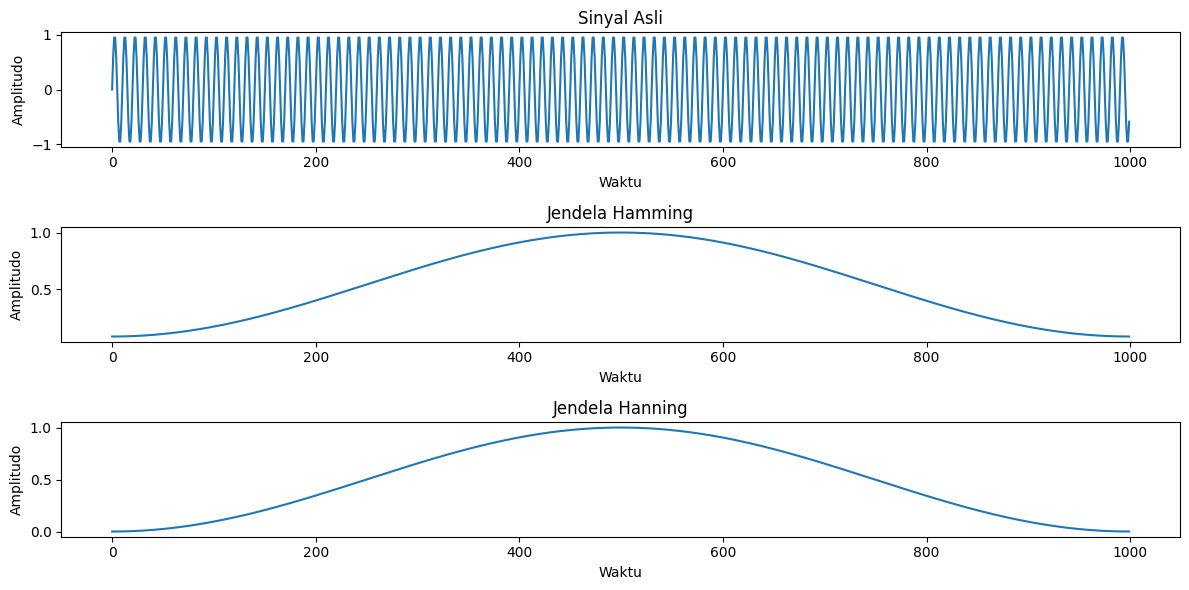

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Panjang sinyal
N = 1000

# Generate sinyal sinusoidal
fs = 100  # Frekuensi sampel
f = 10    # Frekuensi sinyal
n = np.arange(N)
x = np.sin(2 * np.pi * f * n / fs)

# Jendela Hamming
w_hamming = np.hamming(N)

# Jendela Hanning
w_hanning = np.hanning(N)

# Plot sinyal asli dan jendela
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(n, x)
plt.title('Sinyal Asli')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

plt.subplot(3, 1, 2)
plt.plot(n, w_hamming)
plt.title('Jendela Hamming')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

plt.subplot(3, 1, 3)
plt.plot(n, w_hanning)
plt.title('Jendela Hanning')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()